In [ ]:
#Some imports
import datetime
import pandas as pd
import requests
import matplotlib.pyplot as plt

#Marinella surf spot ID (https://www.surfline.com/surf-report/marinella/584204204e65fad6a7708ff4) for 16 days forecast
#and the api and headers we are using to get our request working
surf_sopt_id = "584204204e65fad6a7708ff4"
days = "16"
api_url = f"https://services.surfline.com/kbyg/spots/forecasts/wave?spotId={surf_sopt_id}&days={days}&intervalHours=1"


#go to this site to find your user agent : https://www.whatismybrowser.com/detect/what-is-my-user-agent/
headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36",
}

#in data we store the results of our request 
data = requests.get(api_url, headers=headers).json()

#For each day in data (we only are interested in the date and the surf height in meters and compared to body size)
#change the format of the datetime  
for day in data["data"]["wave"]:
    _time = (
        datetime
        .datetime
        .fromtimestamp(day['timestamp'])
        .strftime('%Y-%m-%d %H:%M:%S')
    )
    
#print the results of the data we wanted    
    print(f"{_time}")
    surf = day["surf"]
    print(f"Surf: {surf['min']} - {surf['max']}")
    print(f"{surf['humanRelation']}")
    
   

In [ ]:
#print all the data that were webscrapped (just to have a look)

data

In [ ]:
#sotre in dat the data that interests us
dat=data["data"]["wave"]
dat
#we can notice that the data that we want for this study is the datetime (timestamp) and the surf height (surf)

In [6]:
#build a data frame with the data that interest us
df = pd.DataFrame(dat, columns=['timestamp','surf'])
df




,timestamp,surf
0,1684274400,"{'min': 0.9, 'max': 1.4, 'optimalScore': 2, 'p..."
1,1684278000,"{'min': 0.9, 'max': 1.4, 'optimalScore': 2, 'p..."
2,1684281600,"{'min': 0.9, 'max': 1.5, 'optimalScore': 2, 'p..."
3,1684285200,"{'min': 0.9, 'max': 1.5, 'optimalScore': 2, 'p..."
4,1684288800,"{'min': 0.9, 'max': 1.5, 'optimalScore': 2, 'p..."
...,...,...
379,1685638800,"{'min': 0.3, 'max': 0.6, 'optimalScore': 0, 'p..."
380,1685642400,"{'min': 0.3, 'max': 0.6, 'optimalScore': 0, 'p..."
381,1685646000,"{'min': 0.3, 'max': 0.6, 'optimalScore': 0, 'p..."
382,1685649600,"{'min': 0.3, 'max': 0.6, 'optimalScore': 0, 'p..."


In [6]:
df2['date']=pd.to_datetime(df2['date'], unit='s')
#build a data frame with the data that interest us
df = pd.DataFrame(dat, columns=['timestamp','surf'])
df




,timestamp,surf
0,1684274400,"{'min': 0.9, 'max': 1.4, 'optimalScore': 2, 'p..."
1,1684278000,"{'min': 0.9, 'max': 1.4, 'optimalScore': 2, 'p..."
2,1684281600,"{'min': 0.9, 'max': 1.5, 'optimalScore': 2, 'p..."
3,1684285200,"{'min': 0.9, 'max': 1.5, 'optimalScore': 2, 'p..."
4,1684288800,"{'min': 0.9, 'max': 1.5, 'optimalScore': 2, 'p..."
...,...,...
379,1685638800,"{'min': 0.3, 'max': 0.6, 'optimalScore': 0, 'p..."
380,1685642400,"{'min': 0.3, 'max': 0.6, 'optimalScore': 0, 'p..."
381,1685646000,"{'min': 0.3, 'max': 0.6, 'optimalScore': 0, 'p..."
382,1685649600,"{'min': 0.3, 'max': 0.6, 'optimalScore': 0, 'p..."


In [10]:
#convert the datetime to the right format in a column called date
#and extract the infos contained in surf into multiple columns
df2=df.surf.apply(pd.Series)
df2['date']=pd.DataFrame(dat, columns=['timestamp'])
df2['date']=pd.to_datetime(df2['date'], unit='s')
df2

,min,max,optimalScore,plus,humanRelation,raw,date
0,0.9,1.4,2,False,Waist to shoulder,"{'min': 0.85397, 'max': 1.33433}",2023-05-16 22:00:00
1,0.9,1.4,2,False,Waist to shoulder,"{'min': 0.82835, 'max': 1.2943}",2023-05-16 23:00:00
2,0.9,1.5,2,False,Waist to head,"{'min': 0.88346, 'max': 1.38041}",2023-05-17 00:00:00
3,0.9,1.5,2,False,Waist to head,"{'min': 0.91434, 'max': 1.42865}",2023-05-17 01:00:00
4,0.9,1.5,2,False,Waist to head,"{'min': 0.89039, 'max': 1.39124}",2023-05-17 02:00:00
...,...,...,...,...,...,...,...
379,0.3,0.6,0,False,Knee to thigh,"{'min': 0.1974, 'max': 0.30844}",2023-06-01 17:00:00
380,0.3,0.6,0,False,Knee to thigh,"{'min': 0.19643, 'max': 0.30692}",2023-06-01 18:00:00
381,0.3,0.6,0,False,Knee to thigh,"{'min': 0.19679, 'max': 0.30749}",2023-06-01 19:00:00
382,0.3,0.6,0,False,Knee to thigh,"{'min': 0.20168, 'max': 0.31513}",2023-06-01 20:00:00


In [30]:
#Have a look at the different surf heights (compared to body size)
set(df2['humanRelation'])

{'Knee to thigh',
 'Overhead',
 'Thigh to stomach',
 'Thigh to waist',
 'Waist to chest',
 'Waist to head',
 'Waist to shoulder'}

In [55]:
#create a data frame called data_rats (no Idea why I called it that way) that contains the count
#for each category of surf height (compared to body size)

rat=df2.groupby(['humanRelation'])['humanRelation'].count()
rats=pd.DataFrame(rat)
rats.rename(columns={ rats.columns[0]: "count" }, inplace = True)
data_rats=rats.reset_index()
data_rats

,humanRelation,count
0,Knee to thigh,86
1,Overhead,28
2,Thigh to stomach,56
3,Thigh to waist,56
4,Waist to chest,49
5,Waist to head,45
6,Waist to shoulder,64


([<matplotlib.patches.Wedge at 0x1298f37c0>,
 [Text(1.134639832628406, 0.1873297899774167, 'Chest to overhead'),
  Text(0.9402225351243212, 0.6621794201305221, 'Knee to thigh'),
  Text(0.27942718077775036, 1.1155359477141908, 'Thigh to stomach'),
  Text(-0.8197982963042508, 0.8064928724896753, 'Thigh to waist'),
  Text(-1.009740444022341, -0.550385533699393, 'Waist to chest'),
  Text(-0.06582287904928581, -1.1481146931355173, 'Waist to head'),
  Text(0.9236886772375921, -0.6850541785458047, 'Waist to shoulder')],
 [Text(0.5919859996322118, 0.09773728172734786, '5%'),
  Text(0.4905508878909502, 0.3454849148507072, '9%'),
  Text(0.14578809431882628, 0.5820187553291432, '14%'),
  Text(-0.4277208502456961, 0.4207788899946132, '20%'),
  Text(-0.5268211012290475, -0.28715766975620505, '21%'),
  Text(-0.03434237167788825, -0.5990163616359221, '11%'),
  Text(0.4819245272543959, -0.3574195714152025, '20%')])

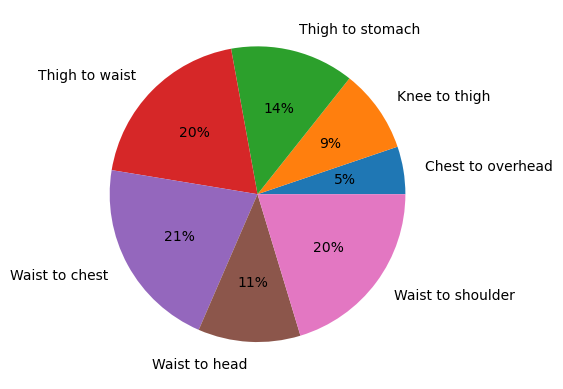

In [9]:
#Create a percentage pie chart of the different surf heights (compared to body size)
plt.pie(x=data_rats['count'], labels=data_rats['humanRelation'],autopct='%.0f%%',labeldistance=1.15)

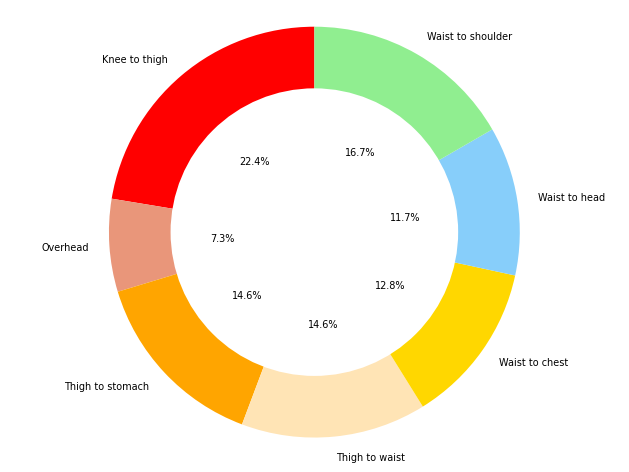

In [60]:
##Create a more elegant and precize percentage pie chart of the different surf heights (compared to body size)
colors =['red','darksalmon','orange','moccasin','gold','lightskyblue','lightgreen','turquoise',"mediumslateblue"]
explode = (0.3,0.6,0.09,0.09,0.09,0.09,0.09,0.09,0.09)
fig1, ax1 = plt.subplots()
ax1.pie(data_rats['count'], labels=data_rats['humanRelation'], autopct='%1.1f%%',colors = colors, startangle=90, pctdistance=0.45, explode = None,textprops={'fontsize': 7})
#draw circle

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

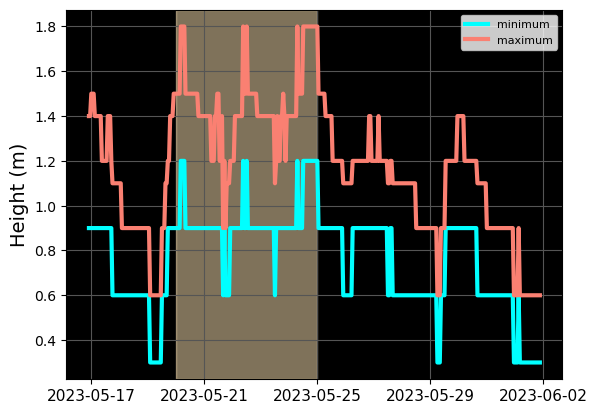

In [12]:
#Create a plot showing the surf height (in meters) evolution through time
ax = plt.axes()
ax.grid(True,color='#555555')
ax.set_facecolor("black")
plt.plot(df2['date'], df2['min'],lw=3, color = 'cyan',label='minimum')
plt.plot(df2['date'], df2['max'],lw=3, color = 'salmon',label='maximum')
plt.xticks(["2023-05-17","2023-05-21","2023-05-25","2023-05-29","2023-06-02"],fontsize=11)
plt.ylabel('Height (m)',fontsize=14)
plt.legend(loc=1,prop={'size': 8})


plt.axvspan("2023-05-20","2023-05-25", color='moccasin', alpha=0.5)